In [4]:
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
file_path = '../out/metrics.csv'

# Load the CSV file with the exact column names from the file
df = pd.read_csv(file_path)

# Calculate TTFT (Time to First Token) and ITL (Inter Token Latency)
df["TTFT"] = df["first_scheduled_time"] - df["arrival_time"]
df["ITL"] = df["last_token_time"] - df["first_scheduled_time"]

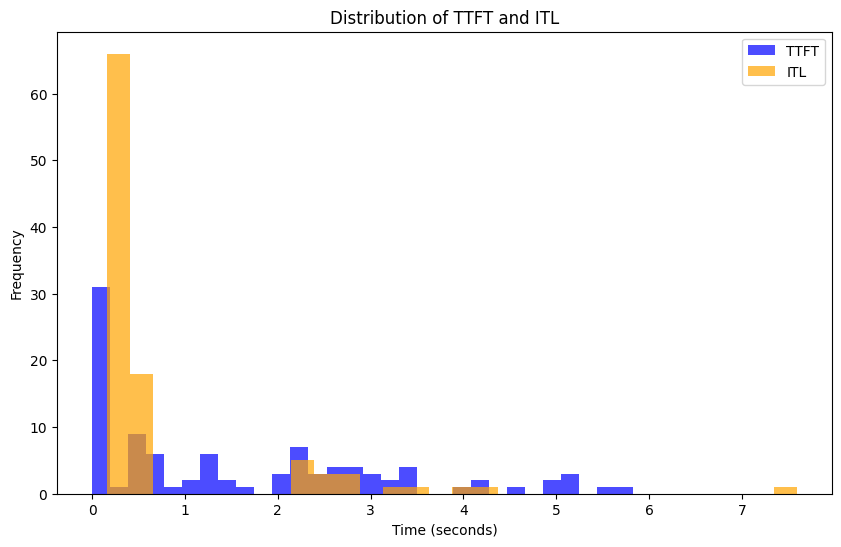

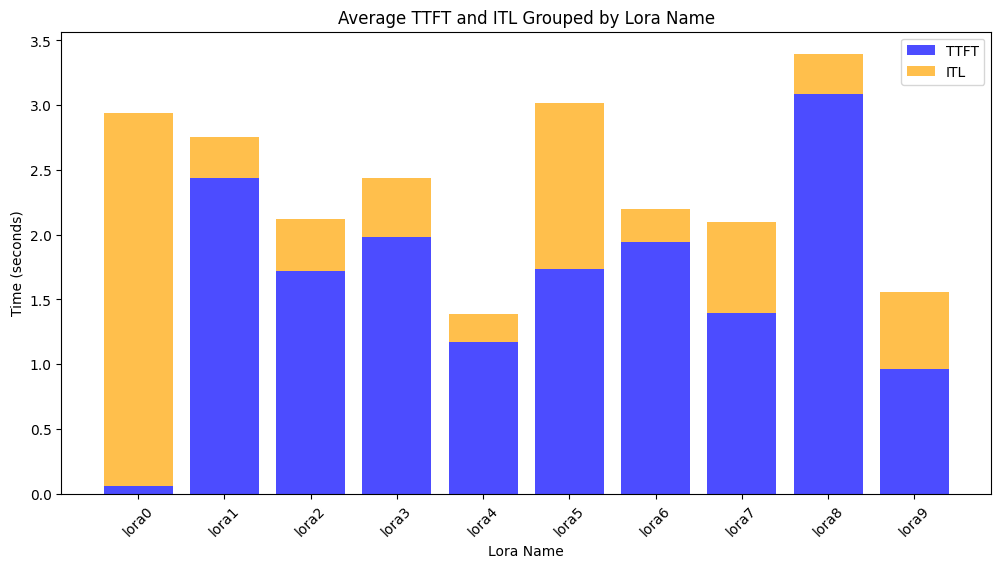

In [6]:
# Plot TTFT and ITL
plt.figure(figsize=(10, 6))
plt.hist(df["TTFT"], bins=30, alpha=0.7, label="TTFT", color='blue')
plt.hist(df["ITL"], bins=30, alpha=0.7, label="ITL", color='orange')
plt.xlabel("Time (seconds)")
plt.ylabel("Frequency")
plt.title("Distribution of TTFT and ITL")
plt.legend()
plt.show()

# Group by 'lora_name' and calculate mean TTFT and ITL
grouped = df.groupby("lora_name").agg({"TTFT": "mean", "ITL": "mean"}).reset_index()

# Plot grouped TTFT and ITL for each 'lora_name'
plt.figure(figsize=(12, 6))
plt.bar(grouped["lora_name"], grouped["TTFT"], alpha=0.7, label="TTFT", color='blue')
plt.bar(grouped["lora_name"], grouped["ITL"], alpha=0.7, label="ITL", color='orange', bottom=grouped["TTFT"])
plt.xlabel("Lora Name")
plt.ylabel("Time (seconds)")
plt.title("Average TTFT and ITL Grouped by Lora Name")
plt.legend()
plt.xticks(rotation=45)
plt.show()